#### TP7 : Classification Multiclass ANN


#### Packages 

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics 
from sklearn import linear_model

In [2]:
import tensorflow as tf 
from tensorflow import keras 
from keras.datasets import fashion_mnist
from keras.utils import to_categorical 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import models 
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, BatchNormalization, Flatten, Dropout

#### Chargement des données 

In [6]:
df_train=pd.read_csv("datasets/fashion-mnist_train.csv")
df_train


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test=pd.read_csv("datasets/fashion-mnist_test.csv")
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Division des données 

In [8]:
X_train = df_train.iloc[:,1:785].values
Y_train = df_train.iloc[:,0].values
X_test = df_test.iloc[:,1:785].values
Y_test = df_test.iloc[:,0].values

#### shapes of data 

X_train.shape, X_test.shape

In [11]:
Y_train.shape , Y_test.shape

((60000,), (10000,))

#### Normalisation

In [14]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

#### Préparation des étiquettes

In [16]:
Y_train_enc = tf.keras.utils.to_categorical(Y_train, num_classes=10)

#### Initialisation de l'ANN

In [17]:
ann = tf.keras.models.Sequential()

#### Déclaration des couches 

In [18]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))


#### Compilation du modèle 

In [20]:
#ann.compile(optimizer = 'adam',
            # loss= 'sparse_categorical_crossentropy',
            # metrics=['sparse_categorical_accuracy'])

In [22]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy')


#### l'evaluation du modèle 

In [23]:
ann.fit(X_train,Y_train_enc, batch_size=128,epochs =60,verbose=1)


Epoch 1/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 9.9273
Epoch 2/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9152
Epoch 3/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6400
Epoch 4/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5344
Epoch 5/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4978
Epoch 6/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4464
Epoch 7/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4350
Epoch 8/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4162
Epoch 9/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4117
Epoch 10/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4135
Epoch 11/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3937
Epoch 12/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4047
Epoch 13/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3795
Epoch 14/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3856
Epoch 15/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

In [32]:
sc
X_test = sc.transform(X_test)

NameError: name 'sc' is not defined

#### Prédiction 

In [25]:
Y_pred = ann.predict(X_test)
# Obtenir la classe prédite pour chaque exemple
Y_pred = np.argmax(Y_pred, axis=1)
print(Y_pred)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[0 1 2 ... 8 8 1]


#### La matrice de confusion 

In [26]:
cn = confusion_matrix(Y_test, Y_pred)
print(cn)

[[836   1  23  21   2   2 100   0  14   1]
 [  2 982   3   9   1   2   0   0   1   0]
 [  6   0 792  10  97   0  89   0   6   0]
 [ 26  16  10 882  39   0  22   0   5   0]
 [  0   2  63  19 870   0  44   0   2   0]
 [  0   0   0   1   0 949   3  23   2  22]
 [157   1  82  17  80   2 648   0  13   0]
 [  1   0   0   0   0  17   0 922   1  59]
 [  2   0   7   5   6   3   3   2 972   0]
 [  0   0   0   0   0  15   0  22   2 961]]


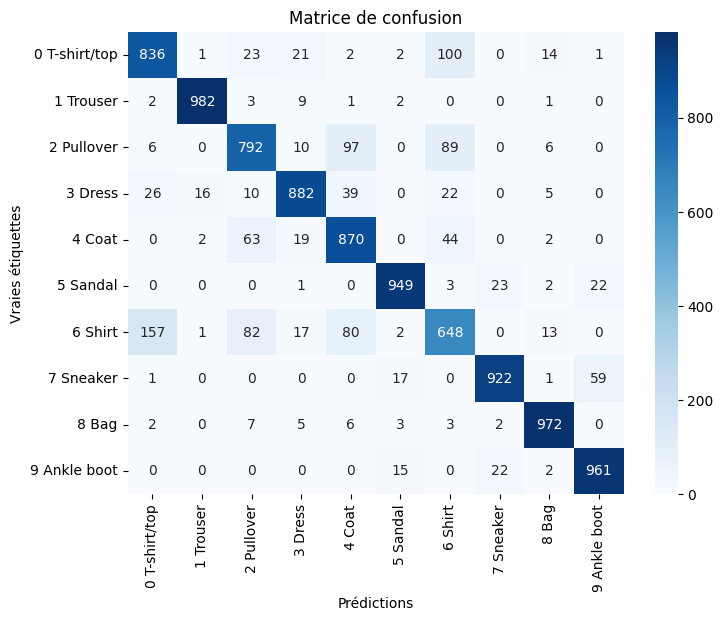

In [31]:
#la matrice de confusion
cn = confusion_matrix(Y_test, Y_pred)

# Définition des étiquettes de classes
classes = ['0 T-shirt/top','1 Trouser','2 Pullover','3 Dress','4 Coat','5 Sandal','6 Shirt','7 Sneaker','8 Bag','9 Ankle boot']


# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cn, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

#### Les métriques d'évaluation

In [29]:
acc_cm = accuracy_score(Y_test, Y_pred)
print(acc_cm)

0.8814


In [33]:
# Prédire la classe d'une observation
xObs=np.array(X_train[0, :]).reshape(1, -1)
Y_prevu1 = ann.predict(xObs)
Y_prevu1 = np.argmax(Y_prevu1, axis=1)
print(Y_prevu1 )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[6]
